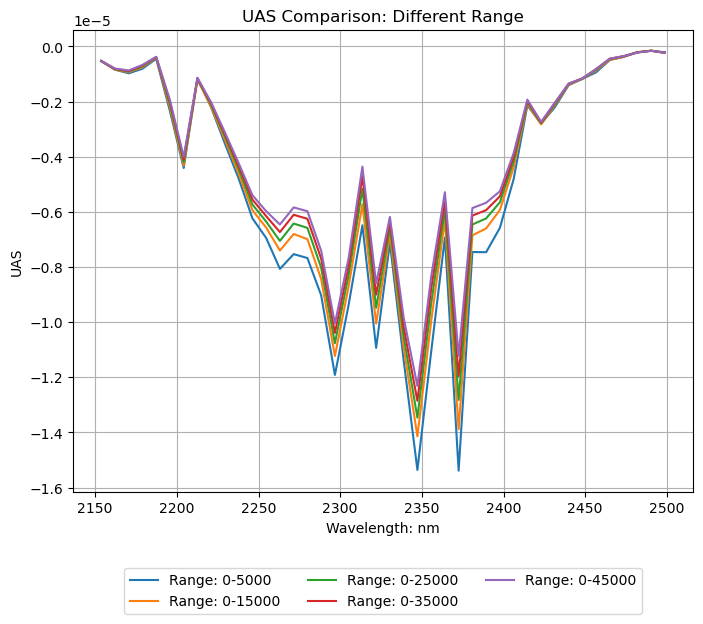

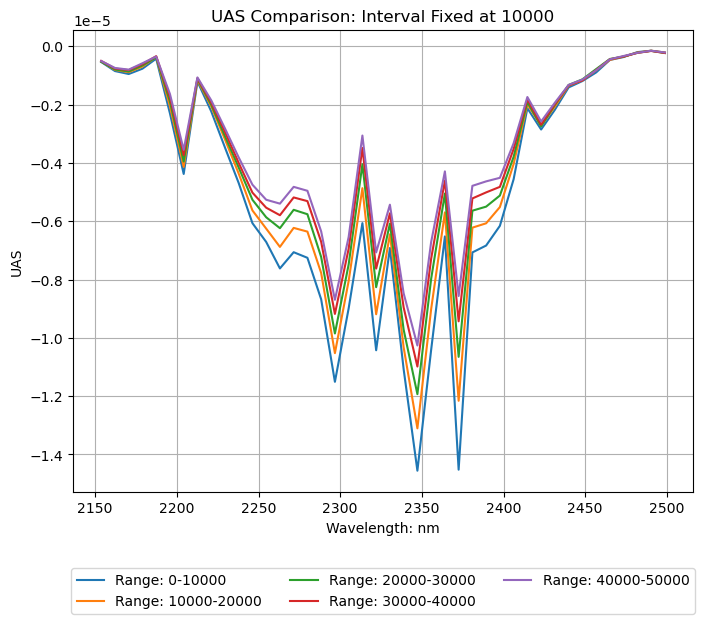

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import time

sys.path.append("C:\\Users\\RS\\VSCode\\matchedfiltermethod\\src")

from utils.satellites_data import general_functions as gf
from utils import satellites_data as sd
from utils import generate_radiance_lut_and_uas as glut
from utils import simulate_images as si
from algorithms import matched_filter_variants as mfs

wvls, general_uas = glut.generate_satellite_uas_for_specific_range_from_lut(
    "AHSI", 0, 50000, 2150, 2500, 25, 0
)

# 参数设置
start = 0
end_range = 50000
step_1 = 10000  # 图一的尾部间隔
step_2 = 10000  # 图二的固定间隔

# 图一：头部固定为 0，尾部从 5000 到 50000，间隔逐步增加
plt.figure(figsize=(8, 6))
for end in range(5000, end_range + 1, step_1):
    x, uas = glut.generate_satellite_uas_for_specific_range_from_lut(
        "AHSI", 0, end, 2150, 2500, 25, 0
    )
    plt.plot(x, uas, label=f'Range: 0-{end}')

plt.title("UAS Comparison: Different Range")
plt.xlabel("Wavelength: nm")
plt.ylabel("UAS")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  # 图例放在底部，分成3列
plt.grid(True)

# 图二：固定间隔 10000，从 0-10000 到 40000-50000
plt.figure(figsize=(8, 6))
for start in range(0, end_range, step_2):
    end = start + step_2
    x, uas = glut.generate_satellite_uas_for_specific_range_from_lut(
        "AHSI", start, end, 2150, 2500, 25, 0
    )
    plt.plot(x, uas, label=f'Range: {start}-{end}')

plt.title("UAS Comparison: Interval Fixed at 10000")
plt.xlabel("Wavelength: nm")
plt.ylabel("UAS")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)  # 图例放在底部，分成3列
plt.grid(True)

# 显示图像
plt.show()
